## Machine Learning mit IoT Testdaten

Basierend auf den Daten vom Temperatur und Luftfeuchtigssensor.

Zuerst holen wir alle Libraries wo benötigt werden

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pylab as plt
import numpy as np
from distutils.version import StrictVersion
import sklearn
print(sklearn.__version__)

#assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
1.4.1.post1


Daten einlesen und evtl. Schmutz entfernen

In [2]:
import pandas as pd

df = pd.read_csv('data.csv', header=None, names=['sensor', 'temp', 'hum', 'class'] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )
df = df.drop( df.index[[0]] )

In [3]:
df.head()

,sensor,temp,hum,class
7,0xBC,25.5,51.3,middle
8,0xBC,30.4,51.2,high
9,0xBC,20.4,51.4,low
10,0xBC,25.4,51.2,middle
11,0xBC,30.5,51.3,high


In [4]:
df.groupby('class').count()

,sensor,temp,hum
class,,,
high,112,112,112
low,112,112,112
middle,113,113,113


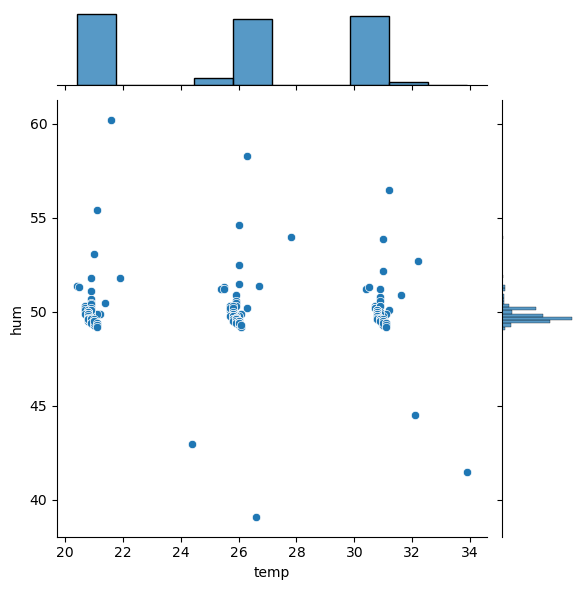

In [5]:
import seaborn as sns
sns.jointplot(x=df['temp'], y=df['hum'])

In [6]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)
X = df[['temp', 'hum']]
y = df[['class']]
y = ravel( y )
clf.fit( X, y )
clf.score( X, y )

1.0

## Gegenprüfung mit Testdaten

In [7]:
test = pd.read_csv('test.csv', header=None, names=['sensor', 'temp', 'hum', 'class'] )
test.head()

,sensor,temp,hum,class
0,0xBC,20.4,51.6,low
1,0xBC,25.4,51.6,middle
2,0xBC,30.4,51.5,high
3,0xBC,20.4,51.4,low
4,0xBC,25.4,51.5,middle


In [8]:
X = test[['temp', 'hum']]
y = test[['class']]
y = ravel( y )
clf.score( X, y )

0.9912790697674418

## Um zu verstehen wie die Abweichungen liegen, zeichen wir einen Plot

* Dazu brauchen wir nachfolgenden Hilfscode.
* Müssen die Daten als Array aufbereiten
* Müssen die Labels 'low', 'middle', 'high' in 0 - 2 Umwandeln

In [9]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
font_size=25

def meshGrid(x_data, y_data):
    h = .02  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

In [10]:
t = test[['temp']]
h = test[['hum']]
t = ravel( t )
h = ravel( h )
l = test[['class']]
l = l.replace( 'low', 0 )
l = l.replace( 'middle', 1 )
l = l.replace( 'high', 2 )
l = ravel( l )

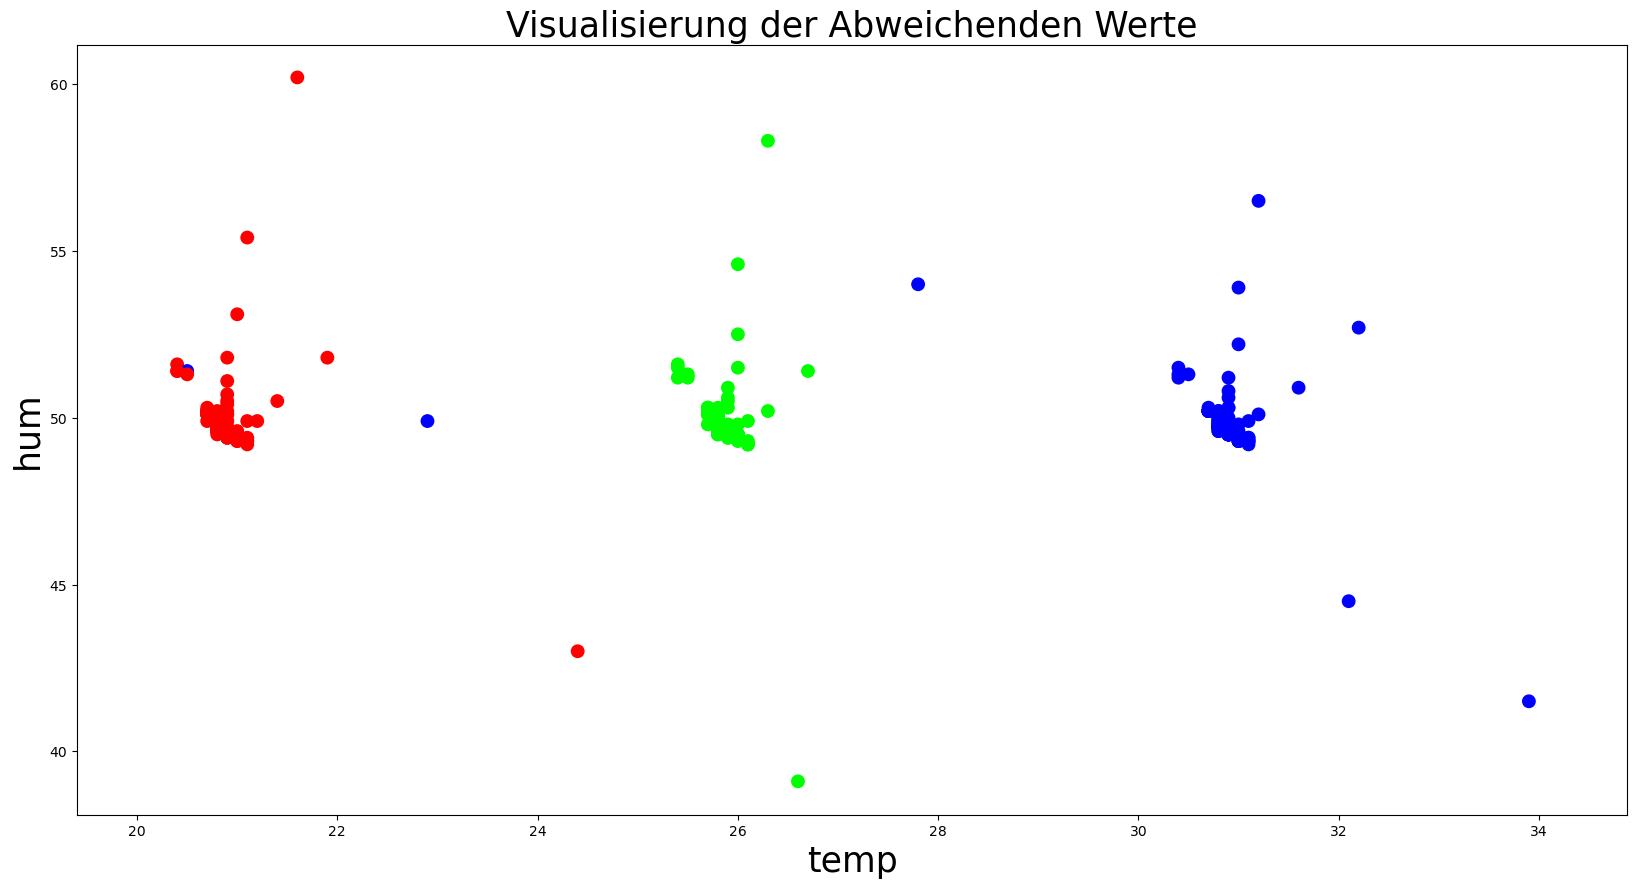

In [11]:
plotPrediction(clf, t, h, 'temp', 'hum', l,mesh=False, title="Visualisierung der Abweichenden Werte")